In [1]:
from astropy.io import fits
from astropy.table import Table
from astropy.modeling import models
from astropy import units as u
import astropy.constants as const
from astropy.nddata import StdDevUncertainty
from astropy.visualization import quantity_support
quantity_support()

from specutils.analysis import snr, correlation, equivalent_width, template_logwl_resample
from specutils.manipulation import box_smooth, gaussian_smooth, trapezoid_smooth, extract_region
from specutils.spectra import Spectrum1D, SpectralRegion, SpectrumCollection
from specutils.fitting import fit_generic_continuum, find_lines_derivative, fit_lines

import matplotlib.pyplot as plt

In [2]:
from astropy.utils.data import download_file
from specutils.io.registers import identify_spectrum_format

In [18]:
identify_spectrum_format("DMTau.ms.fits")  

'iraf'

In [20]:
# spec1d = Spectrum1D.read("DMTau.ms.fits", format='iraf')

In [21]:
spec = fits.open("DMTau.ms.fits")

In [22]:
spec.info()

Filename: DMTau.ms.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     127   (2635, 1, 4)   float32   


In [23]:
spec[0].data

array([[[  13.719798,   39.366127,   41.712444, ..., 1029.3982  ,
         1020.24023 , 1004.793   ]],

       [[  11.391471,   38.794266,   46.14159 , ..., 1063.1091  ,
         1058.7313  , 1009.6136  ]],

       [[  49.715057,   22.789574,   37.07408 , ...,  770.23895 ,
          708.54004 ,  730.06934 ]],

       [[  16.629381,   16.75232 ,   17.088804, ...,   38.347363,
           37.822395,   37.784668]]], dtype=float32)

In [14]:
# with fits.open("DMTau.ms.fits") as hdul:  # open a FITS file
#     data = hdul[1].data  # assume the first extension is an image

In [15]:
data = spec[0].data

In [48]:
wavelength = 1.47105300426483 *data[2,0] + 3615.14379882812 
flux = data[3,0]


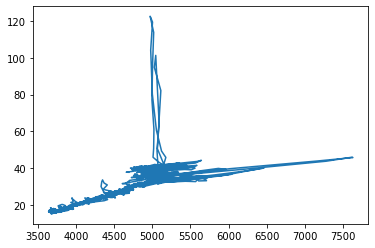

In [49]:
plt.plot(wavelength, flux)

In [83]:
def SDSSfitsSpec_to_Table(specFilename):
    spec = fits.open(f"{specFilename}.fits")
    wavelength = 10.0**spec[1].data['loglam']
    flux = spec[1].data['flux']
    error = np.sqrt(1.0 / spec[1].data['ivar'])

    spec_Table = Table()
    spec_Table.add_column(wavelength, name="wavelength")
    spec_Table.add_column(flux, name="flux")
    spec_Table.add_column(error, name="error")

    return spec_Table